# Introduction to SpatialTis


**What is SpatialTis?**

SpatialTis is a spatial analysis toolkit for single-cell multiplexed tissue data, it use `AnnData` object as input. 


**Prerequisite**

Before we going further, you need to have a basic knowledge of [numpy](https://numpy.org/) and [pandas](https://pandas.pydata.org/). If you know neither, you better stop here and take 10 mins to read their tutorial. Afterwards, I'm sure you can get along well with [anndata](https://anndata.readthedocs.io/en/latest/), since it's operation is very much similar to pandas. You can read this [blog](https://falexwolf.de/blog/171223_AnnData_indexing_views_HDF5-backing/) to get yourself familiar with anndata.

Now that you are prepared! Let's get started!

## Using SpatialTis

Make sure you follow the code convention in your ananlysis.

`spatialtis` --> `st`

`spatialtis.plotting` --> `sp`

In [1]:
import spatialtis as st

To visualize the results, you can import the plotting module

In [2]:
import spatialtis.plotting as sp

Great! Now let's load some data for analysis, throughout the tutorial, the dataset I used is from this article:

[A Map of Human Type 1 Diabetes Progression by Imaging Mass Cytometry](https://www.sciencedirect.com/science/article/pii/S1550413118306910#sec2). [Download](https://uofmacau-my.sharepoint.com/:u:/g/personal/yb97643_umac_mo/EXJFp1Nn_k5NphOp986lGvABmDNC_fNPGjrw5xN4NUPnRA?download=1) the data.

For the origin data:
[Link](https://data.mendeley.com/datasets/cydmwsfztj/2) to supplement materials

In [3]:
from anndata import read_h5ad
data = read_h5ad('../data/imc_data.h5ad')

Let's check what's in our dataset

In [4]:
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type'
    var: 'markers'

We have 1,776,974 cells (n_obs: number of observations), 38 markers (n_vars: number of variables).

In the `obs` field, **area, eccentricity, centroid** are information of cell morphology.

**cell_type, cell_cat** are the cell type information, 

**islet_id, image, case, slide, part, group, stage** are the metadata of our dataset.

## Setting Global Configurations

Some of the information is used repeatively throughout the analysis. Using `CONFIG` can save you from typing them again and again.

Here are some of the important configurations, for more, please see the next chapter.

- `EXP_OBS`: (**Required**) How you experiment data is designed

- `ROI_KEY`: Which key represent the ROI (others might used "FOV"). By default, the last element in `EXP_OBS` will be used.

- `CELL_TYPE_KEY`: The key of the cell type. If you only do analysis on markers, you don't need this.

- `MARKERS_KEY`: The key of markers.

To know more about setting configurations in SpatialTis, go on to **2-Setting configurations**

In [5]:
st.CONFIG.EXP_OBS = ["stage", "case", "part", "image"]
st.CONFIG.ROI_KEY = "image"
st.CONFIG.CELL_TYPE_KEY = "cell_type"
st.CONFIG.MARKER_KEY = "markers"
st.CONFIG.CENTROID_KEY = "centroid"
st.CONFIG.AUTO_SAVE = "./my_result_folder" # This will automatically save your visualization

Now check your configurations

In [6]:
st.CONFIG

Since we've set the global configurations, you can simply run your analysis like:

```python
st.cell_components(data)
```

If you don't, you will need to repeat typing the same paramters like the following example for the rest of your analysis. However, if you suddenly want to change a configurations for just one analysis, you can simply overwrite it locally by passing paramters.

```python
st.cell_components(data, 
                   exp_obs=["stage", "case", "part", "image"],
                   cell_tpe_key="cell_cat") # overwrite the cell_type_key to "cell_cat", 
                                            # without affecting the CONFIG
```

## View your data

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

You can visualize how the cells are distributed

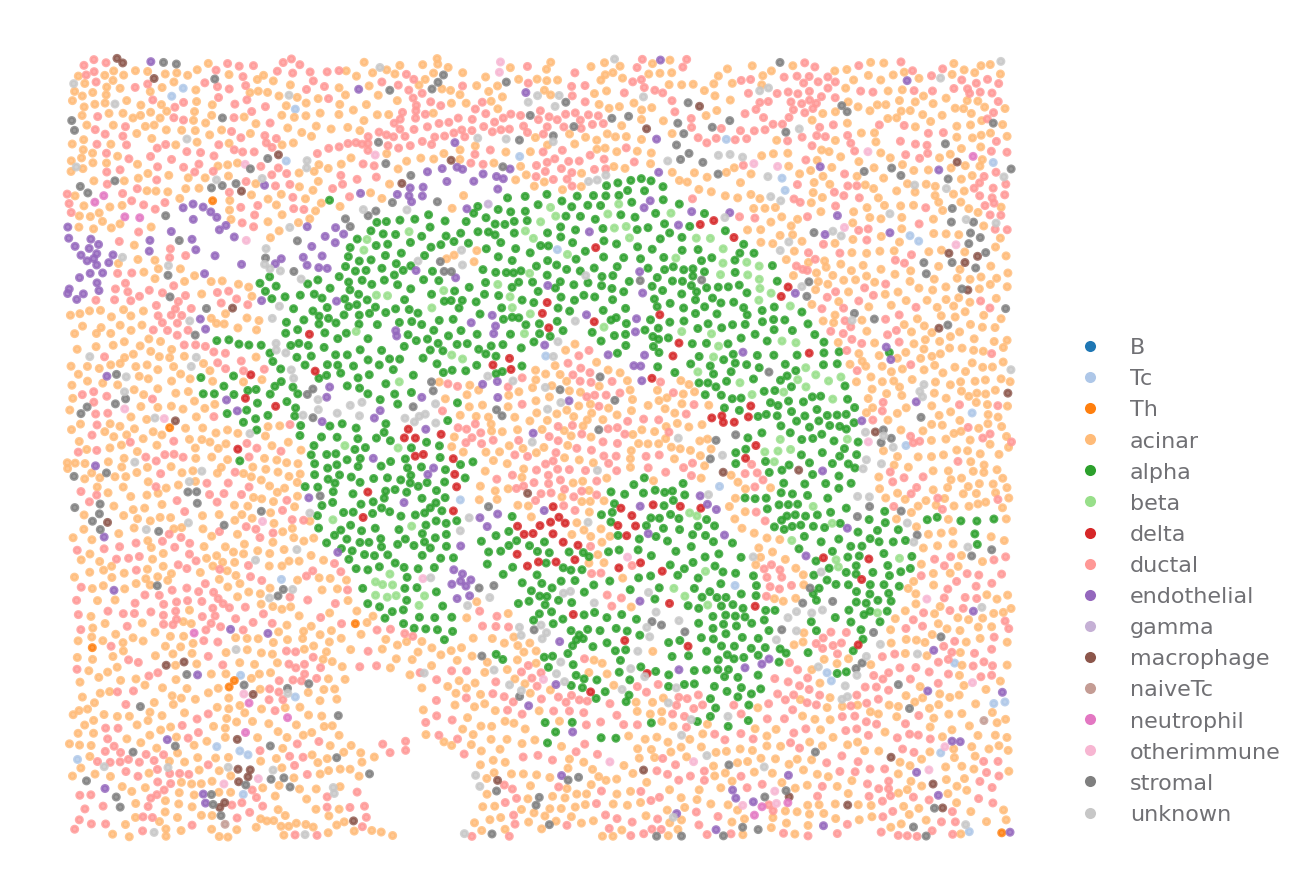

In [8]:
ROI = {"stage": "Onset", "case": 6362, "part": "Tail", "image": "A01"}
sp.cell_map(data, ROI)

Also the markers expression

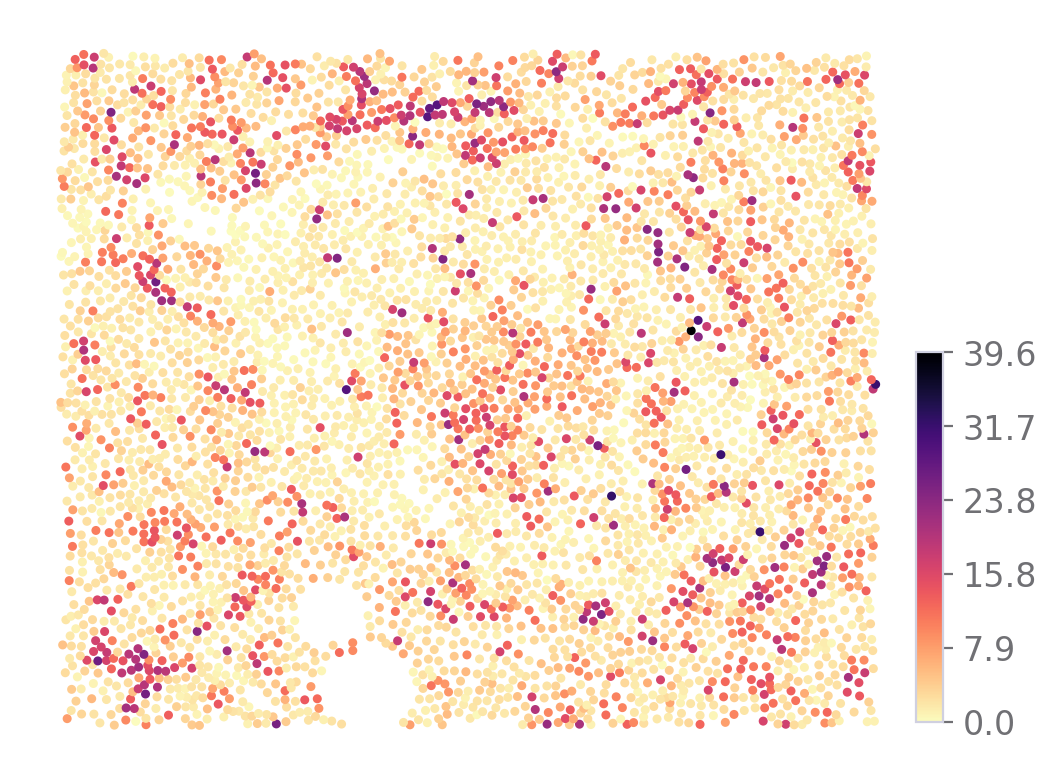

In [9]:
sp.expression_map(data, ROI, "SST")

Many plotting functions comes with both "static" and "interactive" visualization. 

Put your mouse on the plot to find out what's going on.

<div class="alert alert-block alert-info">
    You need to call <code>.render()</code> for pyecharts' visualizations
</div>

In [10]:
sp.cell_map(data, ROI, use="interactive", size=(400, 600))

In [11]:
sp.expression_map(data, ROI, "SST", use="interactive").render()

## Do some analysis

We can count the type of cells in different diabete stages

In [12]:
st.cell_components(data)

To visualize the every analysis results, there is always a plotting function with same name as the analysis function.

For example: the plotting function for `st.cell_components` is `sp.cell_components`

Make sure you don't make any typo mistake.

### About customizing your visualization

You can pass following parameters, but might not work in some visualizations.

- **palette**: The name of a color [palette](https://docs.bokeh.org/en/latest/docs/reference/palettes.html), or an array of color.
- **size**: size of figure, the unit in matplotlib are inches, in bokeh/pyecharts are pixels.
- **title**
- **xaxis_title** / **yaxis_title** / **legend_title**
- **xtickslabel_rotation** / **ytickslabel_rotation**


- To customized **matplotlib** styles, just use [`matplotlib.rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html). The default theme here is `gadfly`.
- To customized **pyecharts** theme, refer to [pyecharts' themes](https://pyecharts.org/#/zh-cn/themes). For non-Chinese user, used google translation to read. The english version is outdated.
- To cutomized **bokeh** styles, please refer to their [documentaion](https://docs.bokeh.org/en/latest/index.html).

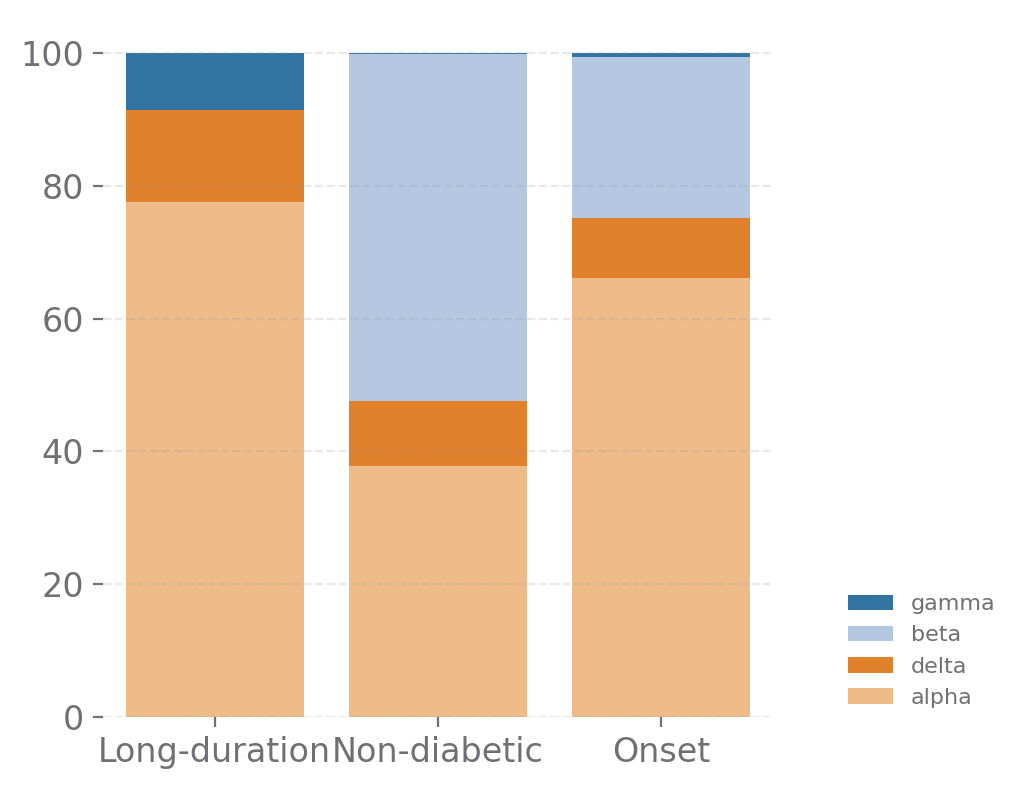

In [20]:
islets_cells = ['gamma', 'delta', 'alpha', 'beta']
sp.cell_components(data, groupby=['stage', 'part'], selected_types=islets_cells, size=(4, 4))

## Retrieve analysis result

You can read SpatialTis result in dataframe object for further analysis or visualization.

**Method 1**: Using attribute `.result`

In [14]:
result = st.cell_components(data).result

**Method 2**: Read from the anndata.uns, if you know the key that store the SpatialTis's results

In [15]:
result = st.get_result(data, "cell_components")

In [16]:
result.head(5)

,stage,case,part,image,type,value
0,Long-duration,6089,Body,Q01,acinar,702
1,Long-duration,6089,Body,Q02,acinar,1344
2,Long-duration,6089,Body,Q03,acinar,863
3,Long-duration,6089,Body,Q04,acinar,938
4,Long-duration,6089,Body,Q05,acinar,764
